# OVERVIEW #

This notebook imports the United States COVID and airline traveler DataFrame exported as .csv in the COVID19_Travel_Create_DataFrames notebook.


In the COVID19_Travel_Create_DataFrames.ipynb file, United States COVID data and airline traveler data was imported from .csv, saved in DataFrames, converted into useful datatypes, and then merged into a single DataFrame.  That DataFrame was then exported as a .csv file.


This notebook presents key questions about the data, creates visualizations using Seaborn, and presents observations.  

In [1]:
#Import Time, Datetime, MatPlotLib, Seaborn, Pandas, Numpy
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# SECTION 1: Key Questions #

#### Here are key questions explored through this analysis: ####


1. What was 'typical' travel like each month in 2019 and 2020?  


2. What were the COVID trends in 2020 for those same date ranges?  


3. What was the correlation between COVID and travel in the *early* (March/April), *middle* (May -July), and *late( (Aug - Oct) parts of the 'first wave' of COVID 2020?

*Note: the longer term plan is to continue to follow the trend through the end of 2020 and into 2021 as the COVID second wave plays out this Fall/Winter.*

# SECTION 2: Import and Convert the Data #

#### Import and preview the .csv file ####

In [2]:
#Import the COVID DataFrame created and saved as .csv in the 'COVID19Travel_Create_DataFrames' notebook

covid_travel = pd.read_csv('covid_travel.csv')

#Preview the DataFrame

covid_travel.tail()

,Unnamed: 0,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
225,2020-10-12,39044,344,1577,958440,2616771
226,2020-10-13,57448,526,2521,680894,2313632
227,2020-10-14,34957,270,1337,717940,2317763
228,2020-10-15,49693,382,1458,950024,2581007
229,2020-10-16,58350,465,1796,973046,2637667


*The use of the .csv file added added a numbered index to the data, instead of using the dates as the index.  This is beneficial because the dates need to be in their own column in order to include them in the visualizations.


#### Check the datatypes and rename the dates column ####

In [3]:
#Check the datatypes
covid_travel.info()

#The dates column can be renamed and the values re-converted to date datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          230 non-null    object
 1   Cases                               230 non-null    int64 
 2   Deaths                              230 non-null    int64 
 3   Hospitalizations                    230 non-null    int64 
 4   2020 Traveler Count                 230 non-null    int64 
 5   2019 Traveler Count (Same Weekday)  230 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.9+ KB


In [4]:
#Rename the dates column, from 'Unnamed'

covid_df = covid_travel.rename(columns = {"Unnamed: 0": "Date"})
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,232,12,71,2280522,2301439
1,2020-03-02,161,14,46,2089641,2257920
2,2020-03-03,224,11,58,1736393,1979558
3,2020-03-04,217,15,67,1877401,2143619
4,2020-03-05,252,9,73,2130015,2402692


#### Convert the datatypes ####

In [5]:
#Import the datetime module
import datetime

#Convert the dates in the date column
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

#Check the datatype for each column - the Date column is now datetime
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                230 non-null    datetime64[ns]
 1   Cases                               230 non-null    int64         
 2   Deaths                              230 non-null    int64         
 3   Hospitalizations                    230 non-null    int64         
 4   2020 Traveler Count                 230 non-null    int64         
 5   2019 Traveler Count (Same Weekday)  230 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 10.9 KB


In [6]:
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,232,12,71,2280522,2301439
1,2020-03-02,161,14,46,2089641,2257920
2,2020-03-03,224,11,58,1736393,1979558
3,2020-03-04,217,15,67,1877401,2143619
4,2020-03-05,252,9,73,2130015,2402692


# SECTION 3: Create categories for plotting #

#### Create bins to summarize the data by month ####


Datetime datatypes cannot be binned with the pd.cut() method.


Instead, a month index (number of the month) is created for each date first and that is used for the bins.

In [7]:
#Create a month index for each date and list as a separate column
covid_df["Month_Index"] = pd.DatetimeIndex(covid_df["Date"]).month
 
#Create bins using pd.cut() on the new "Month" column and append them to the DataFrame
month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
month_labels = ["Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec", "Jan"]
covid_df["Month"] = pd.cut(covid_df["Month_Index"], month_bins, labels=month_labels)

covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month
0,2020-03-01,232,12,71,2280522,2301439,3,Mar
1,2020-03-02,161,14,46,2089641,2257920,3,Mar
2,2020-03-03,224,11,58,1736393,1979558,3,Mar
3,2020-03-04,217,15,67,1877401,2143619,3,Mar
4,2020-03-05,252,9,73,2130015,2402692,3,Mar


#### Pivot the data so that it can be plotted ####

In [8]:
#Use the pd.melt() method to pivot the 2019 and 2020 traveler counts so that they can be called from the same column
tsa_plots = pd.melt(covid_df, id_vars=['Date'], value_vars=['2020 Traveler Count', '2019 Traveler Count (Same Weekday)'], var_name='Travelers', value_name='Counts')
tsa_plots

,Date,Travelers,Counts
0,2020-03-01,2020 Traveler Count,2280522
1,2020-03-02,2020 Traveler Count,2089641
2,2020-03-03,2020 Traveler Count,1736393
3,2020-03-04,2020 Traveler Count,1877401
4,2020-03-05,2020 Traveler Count,2130015
...,...,...,...
455,2020-10-12,2019 Traveler Count (Same Weekday),2616771
456,2020-10-13,2019 Traveler Count (Same Weekday),2313632
457,2020-10-14,2019 Traveler Count (Same Weekday),2317763
458,2020-10-15,2019 Traveler Count (Same Weekday),2581007


In [9]:
#Use the pd.melt() method to pivot the covid counts so that they can be called from the same column
covid_plots = pd.melt(covid_df, id_vars=['Month'], value_vars=['Cases', 'Deaths', 'Hospitalizations'], var_name='COVID Metrics', value_name='Counts')
covid_plots


,Month,COVID Metrics,Counts
0,Mar,Cases,232
1,Mar,Cases,161
2,Mar,Cases,224
3,Mar,Cases,217
4,Mar,Cases,252
...,...,...,...
685,Oct,Hospitalizations,1577
686,Oct,Hospitalizations,2521
687,Oct,Hospitalizations,1337
688,Oct,Hospitalizations,1458


# SECTION 4: Visualizations #

## Question 1: What did 2019 and 2020 Airline Travel count look like? ##

My prediction is that there will be far less travelers in 2019 than in 2020.

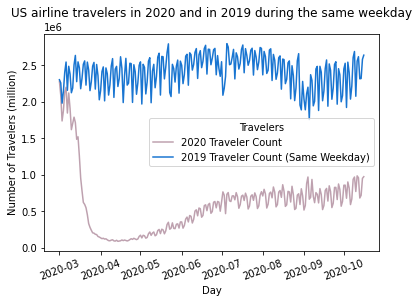

In [13]:
#Display the trend with a lineplot, set line colors using hex codes
hue_colors = {"2020 Traveler Count": "#bea1af", "2019 Traveler Count (Same Weekday)": "#1975d1"}
g = sns.lineplot(x="Date", y="Counts", hue="Travelers", data=tsa_plots, palette=hue_colors)
plt.ylabel("Number of Travelers (million)")
plt.xlabel("Day")
plt.xticks(rotation=20)
g.set_title("US airline travelers in 2020 and in 2019 during the same weekday", y=1.05)
plt.show()
g.figure.savefig('travel.png')

#this code can include a 30-degree rotation for the date labels, however this causes the x-axis label "Day" to get cut off in the exported image.

## Observations: ##

1. As expected, 2019 traveler numbers were much higher than in 2020. They were fairly consistent across the year.
    
2. 2020 traveler numbers dropped dramatically in mid-March and then slowly and steadily rose through the year
    
3. However, 2020 traveler numbers remained far lower than 2019 numbers

## Question 2: What were the COVID trends in 2020 for those same date ranges? ##

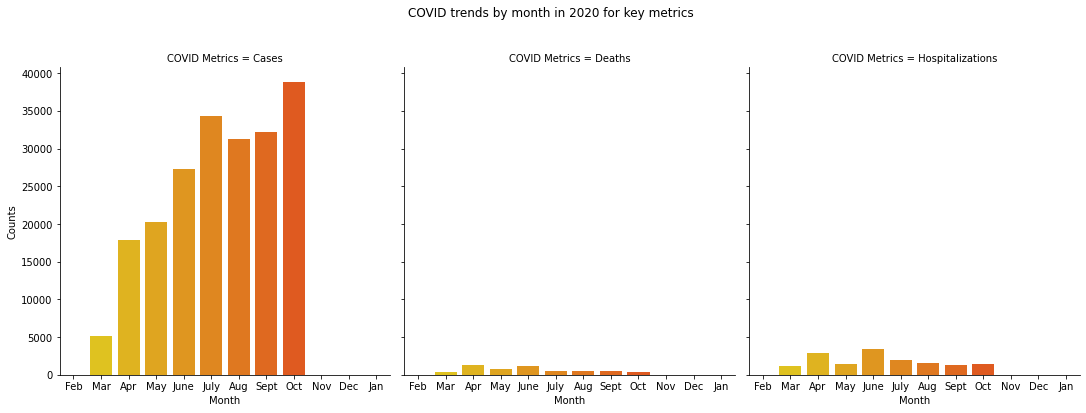

In [14]:
#Create a histogram with subplots to visualize this detail
g = sns.catplot(x="Month", y="Counts", col="COVID Metrics", data=covid_plots, kind="bar", palette="autumn_r", ci=None)
g.fig.suptitle("COVID trends by month in 2020 for key metrics", y=1.10)
plt.show()
g.savefig('covid.png')


## Observations: ##

1. Number of cases rose sharply from March to peak in July.  After a small decrease in August cases rose again to an even higher peak in October.

2. Number of deaths was highest in April with June slightly behind; these numbers were lowest in March and Sept

3. Number of hospitalizations was highest in April and June also.  From June to Sept they decreased but begin rising again in October.

## Question 3: What was the correlation between COVID stats in the early, mid, and late stages of the first wave of COVID in 2020? ##

Early period = March - April, 2020

*key circumstances: first cases and US lockdown*

Middle period = May - July, 2020 

*key circumstances: re-opening the US was heavily debated, safety measures were designed, and much protesting occurred about racial injustice and demands for re-opening.*

Late period = August - October, 2020

*key circumstances: safety measures are in place and many businesses have re-open, children and college students returned to school with a mix of remote and in-person learning, cold and flu season has not yet begun.*


My prediction is that there will be a close correlation in early period, less correlation in mid/late period.

#### Categorize the data into 'Waves' in order to visualize this trend ####

In [15]:
#Create bins to label each period and use pd.cut() on the "Month_Index" column and append them to the DataFrame
period_bins = [1, 5, 8, 11]
period_labels = ["Early First Wave", "Middle First Wave", "Late First Wave"]
                 
covid_df["Wave"] = pd.cut(covid_df["Month_Index"], period_bins, labels=period_labels)

covid_df.head()    

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month,Wave
0,2020-03-01,232,12,71,2280522,2301439,3,Mar,Early First Wave
1,2020-03-02,161,14,46,2089641,2257920,3,Mar,Early First Wave
2,2020-03-03,224,11,58,1736393,1979558,3,Mar,Early First Wave
3,2020-03-04,217,15,67,1877401,2143619,3,Mar,Early First Wave
4,2020-03-05,252,9,73,2130015,2402692,3,Mar,Early First Wave


#### Scale down the 2020 Traveler Count by a factor of 10 ####


The numbers of travelers are so much larger than the number of COVID cases that it is difficult to see the increases/decreases in values when they are plotted together.

In [16]:
#Scale down the 2020 Traveler Count so that the trends can be visualized with COVID trends more easily on the chart

covid_df["Scaled 2020 Traveler Count"] = covid_df["2020 Traveler Count"] / 10


In [17]:
#Then pivot the dataframe and select only the colunmns needed for the plot
line_df = pd.melt(covid_df, id_vars=['Month'], value_vars=['Scaled 2020 Traveler Count', 'Cases'], var_name='Comparison', value_name='Counts')
line_df.head()

,Month,Comparison,Counts
0,Mar,Scaled 2020 Traveler Count,228052.2
1,Mar,Scaled 2020 Traveler Count,208964.1
2,Mar,Scaled 2020 Traveler Count,173639.3
3,Mar,Scaled 2020 Traveler Count,187740.1
4,Mar,Scaled 2020 Traveler Count,213001.5


#### Create the visualization ####

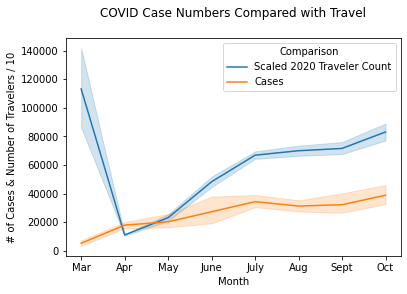

In [18]:
#Display the trend with a lineplot, set line colors using hex codes
g = sns.lineplot(x="Month", y="Counts", hue="Comparison", data=line_df)
plt.ylabel("# of Cases & Number of Travelers / 10")
plt.xlabel("Month")
#plt.xticks(rotation=30)
g.set_title("COVID Case Numbers Compared with Travel", y=1.07)
plt.show()
g.figure.savefig('covid_travel_line.png')

#this code can include a 30-degree rotation for the date labels, however this causes the x-axis label "Month" to get cut off in the exported image.
#the y-axis label does get cut off from the exported image at this time.

## Observations: ##

1. The number of travelers and the number of COVID cases do not appear to rise and fall in sync with each other.

2. In fact, the number of COVID cases was highest in July and that was also nearly the highest number of travelers since the drop in travelers in April

3. However, the number of travelers increased to a smaller degree in July - Sept, while the number of COVID cases declined slightly. This could indicate that travel slowed after the peak in COVID cases in July

#### Plot the same data with a bar chart, using 'Waves' instead of Month ####

In [19]:
#Pivot the COVID dataframe by wave instead of month and select only the colunmns needed for the plot
bar_df = pd.melt(covid_df, id_vars=['Wave'], value_vars=['Scaled 2020 Traveler Count', 'Cases'], var_name='Comparison', value_name='Counts')
bar_df.head()

,Wave,Comparison,Counts
0,Early First Wave,Scaled 2020 Traveler Count,228052.2
1,Early First Wave,Scaled 2020 Traveler Count,208964.1
2,Early First Wave,Scaled 2020 Traveler Count,173639.3
3,Early First Wave,Scaled 2020 Traveler Count,187740.1
4,Early First Wave,Scaled 2020 Traveler Count,213001.5


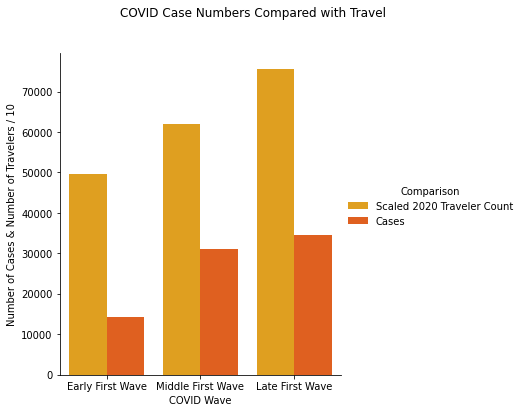

In [20]:
#diplay the same trend, broken into 'Waves' with a bar chart
g = sns.catplot(x="Wave", y="Counts", hue="Comparison", data=bar_df, kind="bar", palette="autumn_r", ci=None)
g.fig.suptitle("COVID Case Numbers Compared with Travel", y=1.10)
g.set_axis_labels("COVID Wave", "Number of Cases & Number of Travelers / 10")
plt.show()
g.savefig('covid_travel_bar.png')

## Observations: ##

This view of the data further demonstrates that the number of travelers does not follow the same patterns as the number of COVID cases:

1. Between the early and middle part of the first wave, the number of travelers increased while the number of COVID cases increased also

2. Between the middle and late part of the first wave, the number of travelers continued to increase, while the number of COVID cases decreased slightly

3. Overall, between the early and late first wave the number of travelers increased while the number of COVID cases increased then decreased
    